In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the file
ecom = pd.read_csv('Ecommerce Customers')
ecom.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [3]:
#no missing data
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [4]:
ecom.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [7]:
len(list(set(ecom['Avatar'])))

138

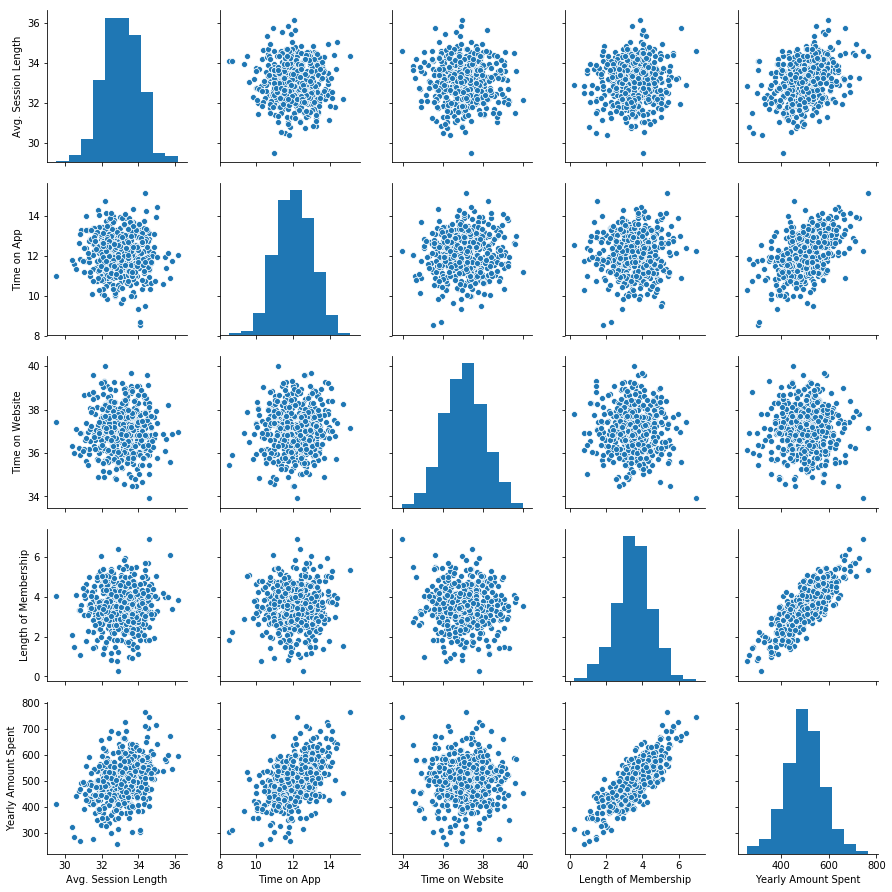

In [8]:
sns.pairplot(ecom)

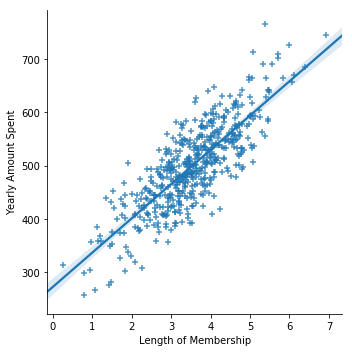

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=ecom,markers='+')

In [14]:
#shows the importance and influence of each column in comparison to Y.A.S
ecom.corr()

Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000

In [47]:
X=ecom[['Avg. Session Length','Time on App','Length of Membership']]
y=ecom['Yearly Amount Spent']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
prediction = lr.predict(X_test)

In [53]:
#the metric for the precision of the model, we got 98%
print(metrics.r2_score(y_test,prediction))

0.9833799020430727


In [58]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction))) 

MAE 7.7598044817493
MSE 99.2507369857245
RMSE 9.962466410770201


In [59]:
#shows with 1 unit of each column how much increase in money do we obtain
lr.coef_

array([26.15679483, 39.03366556, 61.56917155])